In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [12]:
dataset = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()
train_images[600]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86,  97,  16,
          0,   0,   0,   9,  64,  70,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 108, 142, 149, 214, 196,
        165, 149, 150, 160, 162, 112, 124, 105,  49,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 182, 148, 126, 121, 122, 148,
        154, 154, 153, 154, 109,  78,  98, 106, 125,  84,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 157, 160, 118, 128, 122, 122, 122,
        128, 129, 116, 101,  84,  88,  97,  88,  94,  77,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  37, 178, 172, 138, 128, 125, 121, 118,
        102, 100, 105, 100,  96, 102,  90,  96,  66,  50,  46,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 126, 178, 193, 152, 128, 125, 117, 104,
        105, 106, 101, 102, 105,  85,  85,  69,  12,  64,  49,  14,   0,
          0,   0],
       [  

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

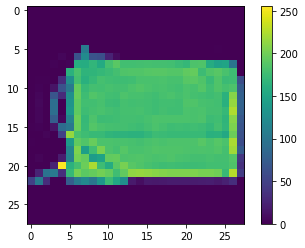

In [25]:
plt.figure()
plt.imshow(test_images[18])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
#scaling the images for best fitting
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
train_images[600]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86,  97,  16,
          0,   0,   0,   9,  64,  70,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 108, 142, 149, 214, 196,
        165, 149, 150, 160, 162, 112, 124, 105,  49,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 182, 148, 126, 121, 122, 148,
        154, 154, 153, 154, 109,  78,  98, 106, 125,  84,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 157, 160, 118, 128, 122, 122, 122,
        128, 129, 116, 101,  84,  88,  97,  88,  94,  77,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  37, 178, 172, 138, 128, 125, 121, 118,
        102, 100, 105, 100,  96, 102,  90,  96,  66,  50,  46,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 126, 178, 193, 152, 128, 125, 117, 104,
        105, 106, 101, 102, 105,  85,  85,  69,  12,  64,  49,  14,   0,
          0,   0],
       [  

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 2ms/step - loss: 11.4683 - accuracy: 0.6495
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7747 - accuracy: 0.7209
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6764 - accuracy: 0.7321
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6172 - accuracy: 0.7501: 0s - loss:
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5597 - accuracy: 0.7845
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5280 - accuracy: 0.8151
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5329 - accuracy: 0.8185
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5051 - accuracy: 0.8289
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5009 - accuracy: 0.8304
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[18]

array([1.6976030e-04, 4.1098629e-06, 1.1783515e-03, 9.3073402e-07,
       9.0861235e-08, 3.2775702e-03, 7.7869243e-04, 2.3230760e-04,
       9.9434704e-01, 1.1159052e-05], dtype=float32)

In [23]:
np.argmax(predictions[18])

8

In [24]:
test_labels[18]

8